## Exploratory Data Analysis - SampleSuperstore by Varun V

In [1]:
# Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

%matplotlib inline

In [2]:
# Import Data

df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

### Check for missing values

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Check for duplicated rows

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(9977, 13)

### Dataset Information

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


#### Since, the dataset consists of only the data of US, the country variable is unnecessary for profit analysis. Postal Code is also unnecessary as we have city,region and state attributes which can uniquely identify a place.

In [11]:
# Droping unnecessary attributes

df.drop(['Postal Code','Country'],inplace=True,axis=1)

In [12]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


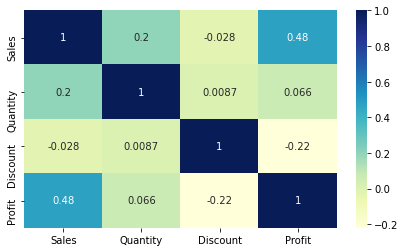

In [13]:
# Correlation between the numerical variables

plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

#### From the above map, we can see that only sales and profit are highly related but there are no strong correlation between attributes. So all the attributes are independent and necessary for profit estimation

### Numerical Features

In [14]:
num_features = [feature for feature in df.columns if df[feature].dtype!='O']

In [15]:
num_features

['Sales', 'Quantity', 'Discount', 'Profit']

In [16]:
df_num = df[num_features]

#### Continuous and Discrete Features

In [17]:
discrete_num_features = [feature for feature in num_features if len(df[feature].value_counts().index) < 20]

In [18]:
discrete_num_features

['Quantity', 'Discount']

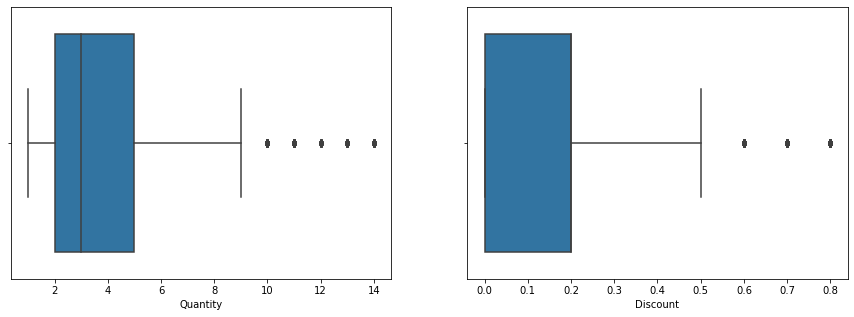

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
i = 0
for feature in discrete_num_features:
    sns.boxplot(x = feature,data=df_num,ax=axes[i],orient="h")
    i = i+1

#### The discrete variables have a less number of outliers

In [20]:
continuos_num_features = [feature for feature in num_features if feature not in discrete_num_features]

In [21]:
continuos_num_features

['Sales', 'Profit']

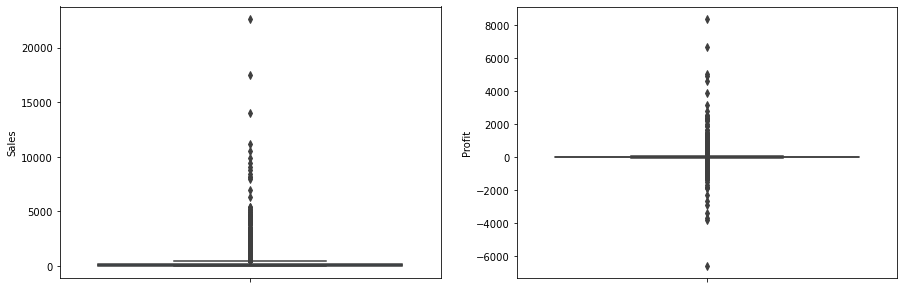

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
i = 0
for feature in continuos_num_features:
    sns.boxplot(x = feature,data=df_num,ax=axes[i],orient="v")
    i = i+1

#### The continuos variables have a large number of outliers which needs to be taken care of for accurate predictions

### Outlier Removal

In [23]:
# Function to remove outliers

def remove_outliers(df,k = 0.33):
    for col in num_features:
        mean = df[col].mean()
        global dataset
        std = df[col].std()    
        outlier = [i for i in df[col] if (i > mean - k * std)]
        outlier = [i for i in outlier if (i < mean + k * std)]       
        dataset = df.loc[df[col].isin(outlier)]
    return dataset

In [24]:
df1 = remove_outliers(df)

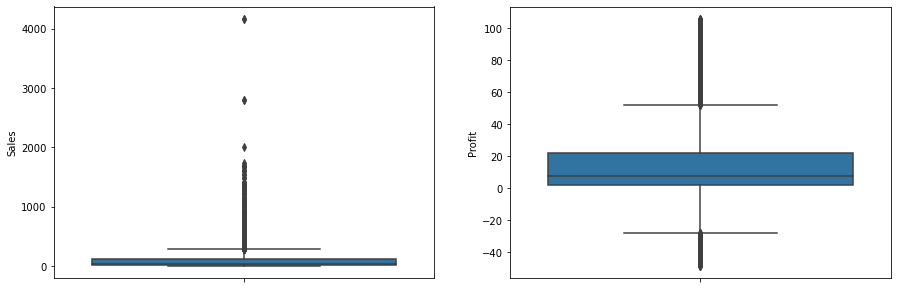

In [25]:
# Checking if the outliers has been removed

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
i = 0
for feature in continuos_num_features:
    sns.boxplot(x = feature,data=df1,ax=axes[i],orient="v")
    i = i+1

#### Most of the outliers have been removed from the dataset

## Analysis based on Regions

### Analyzing Region wise Sales

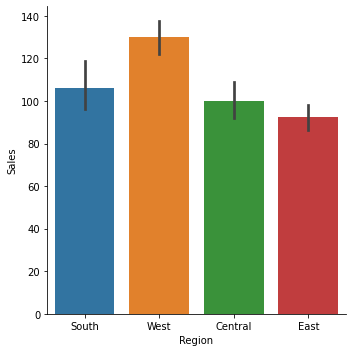

In [26]:
sns.catplot(x = "Region", y = "Sales" , data=df1, kind='bar')

#### Observation: West region has the highest mean sales followed by South. East region has the lowest sales among all the regions.

### Analyzing Category wise Sales in each region

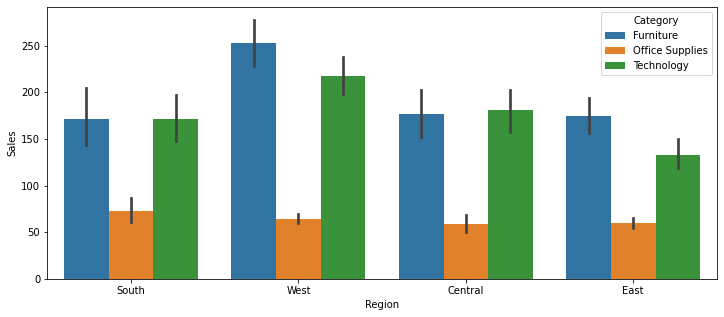

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x = "Region", y = "Sales", hue="Category" , data=df1)

#### Observation: Furniture sales dominates over others in most of the regions closely followed by Technology. Office Supplies contribute very little to the sales in every region.

### Analyzing Segment wise sales in each region

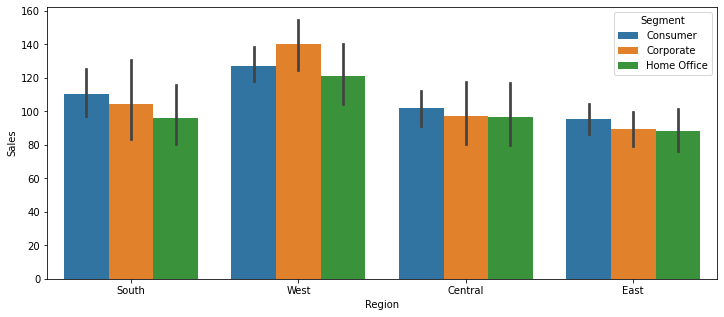

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(x = "Region", y = "Sales", hue="Segment" , data=df1)

#### Observation: There is not much of difference in sales in different segments. Considering all the regions, Home Office sales lags the other two segements.

### Analyzing Segment wise count of ship modes

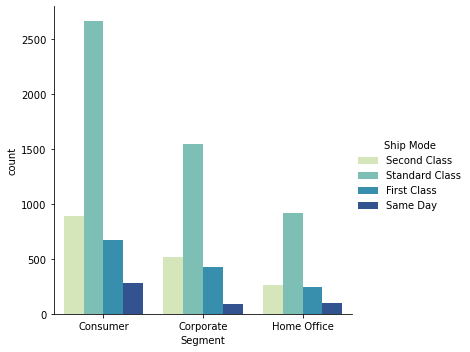

In [29]:
sns.catplot("Segment", hue="Ship Mode", kind="count" , data=df1, palette="YlGnBu")

#### Observation: Standard Class is mostly preferred across every segment.

### Analyzing Sub-Category Sale Count

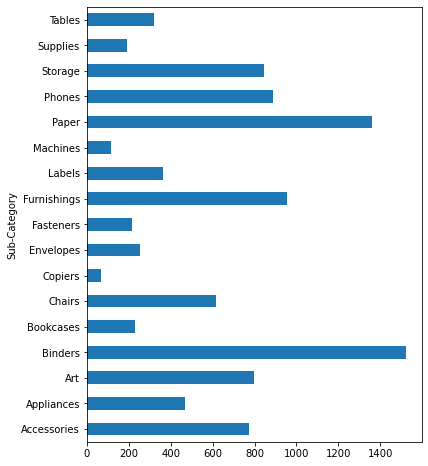

In [30]:
plt.figure(figsize=(6,8))
df.groupby("Sub-Category")["Sub-Category"].count().plot.barh()

#### Observation: Blinders and Papers are the most popular product with more than 1200 items sold.

## Analyzing Profits

### Analyzing Profits association with Segment

In [31]:
grouped_city = df1.groupby("Segment")
# Grouping the sub-categories by Profit
cat_profits = pd.DataFrame(grouped_city['Profit'].agg(np.sum))
# Grouping the sub-categories by Segment Count
cat_sales = pd.DataFrame(grouped_city['Category'].count())
# Merging the two dataframes
result = pd.merge(cat_profits, cat_sales, right_index=True, left_index=True)
# Calculating Profit per Item
result['Profit per item'] = result['Profit']/result['Category']
result = result.sort_values(by=["Profit per item"],ascending=False)
result.head()

,Profit,Category,Profit per item
Segment,,,
Home Office,23063.2412,1518,15.193176
Consumer,66991.9298,4508,14.860677
Corporate,38051.4330,2577,14.765787


#### Observation: Almost all the segments have equal profit per item

### Analyzing Profits association with Category of products

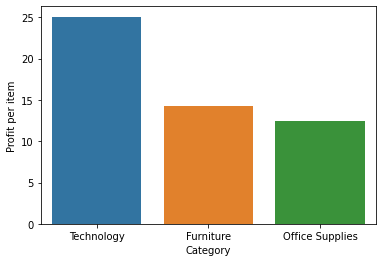

In [32]:
grouped_city = df1.groupby("Category")
# Grouping the sub-categories by Profit
cat_profits = pd.DataFrame(grouped_city['Profit'].agg(np.sum))
# Grouping the sub-categories by Category Count
cat_sales = pd.DataFrame(grouped_city['Category'].count())
# Merging the two dataframes
result = pd.merge(cat_profits, cat_sales, right_index=True, left_index=True)
# Calculating Profit per Item
result['Profit per item'] = result['Profit']/result['Category']
result = result.sort_values(by=["Profit per item"],ascending=False)
sns.barplot(x=result.index,y="Profit per item",data=result)

#### Observation: Office Supplies has the highest profit margins

### Analyzing Profits association with Sub-Category of products

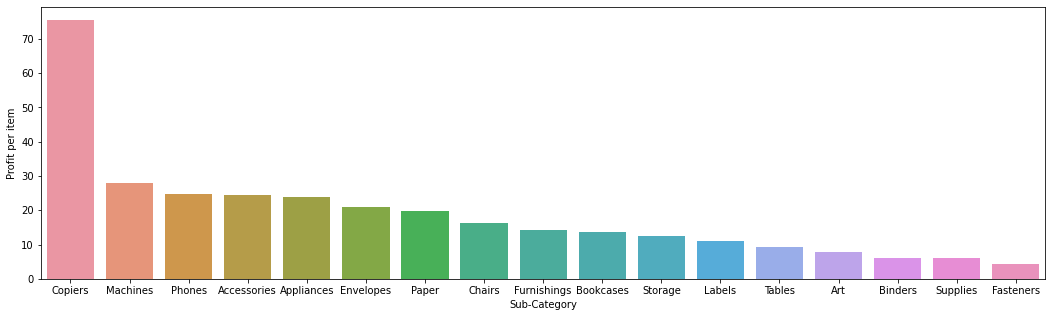

In [33]:
plt.figure(figsize=(18,5))

grouped_city = df1.groupby("Sub-Category")
# Grouping the sub-categories by Profit
subcat_profits = pd.DataFrame(grouped_city['Profit'].agg(np.sum))
# Grouping the sub-categories by Sub Category Count
subcat_sales = pd.DataFrame(grouped_city['Sub-Category'].count())
# Merging the two dataframes
result = pd.merge(subcat_profits, subcat_sales, right_index=True, left_index=True)
# Calculating Profit per Item
result['Profit per item'] = result['Profit']/result['Sub-Category']
result = result.sort_values(by=["Profit per item"],ascending=False)
sns.barplot(x=result.index,y="Profit per item",data=result)

#### Observation: Copiers have the highest Profit per Item among all sub categories

### Analyzing Profits association with Region

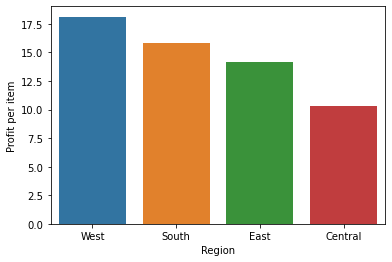

In [34]:
grouped_city = df1.groupby("Region")
# Grouping the sub-categories by Profit
subcat_profits = pd.DataFrame(grouped_city['Profit'].agg(np.sum))
# Grouping the sub-categories by Region Count
subcat_sales = pd.DataFrame(grouped_city['Region'].count())
# Merging the two dataframes
result = pd.merge(subcat_profits, subcat_sales, right_index=True, left_index=True)
# Calculating Profit per Item
result['Profit per item'] = result['Profit']/result['Region']
result = result.sort_values(by=["Profit per item"],ascending=False)
sns.barplot(x=result.index,y="Profit per item",data=result)

#### Observation: West region has the highest profit per item

## Analysis based on Cities

### Analyzing Sales in different cities

In [35]:
grouped_city = df1.groupby("City")
agg_sales = grouped_city['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()
agg_sales.head()

,City,Sales
0,Los Angeles,95442.783
1,New York City,74701.071
2,San Francisco,58027.628
3,Seattle,46361.340
4,Philadelphia,35332.581


### Analyzing Profits in different cities

In [36]:
agg_profits = grouped_city['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
agg_profits.head()

,City,Profit
0,New York City,14524.8822
1,Los Angeles,12954.3807
2,San Francisco,9432.6797
3,Seattle,7487.1736
4,San Diego,3454.8792


#### Observation: Even though Los Angeles has more sales amount than New York, the total profit obtained in New York is higher than Los Angeles

In [37]:
los_ang_data = df1[df1['City']=='Los Angeles']
grouped_sub = los_ang_data.groupby("Sub-Category")
subcat_count = pd.DataFrame(grouped_sub['Sub-Category'].count())
subcat_count.rename(columns={'Sub-Category':'Count'}).sort_values(by=['Count'],ascending=False).head()

,Count
Sub-Category,
Paper,113
Binders,92
Phones,71
Art,66
Furnishings,59


In [38]:
new_york_data = df1[df1['City']=='New York City']
grouped_sub = new_york_data.groupby("Sub-Category")
subcat_count = pd.DataFrame(grouped_sub['Sub-Category'].count())
subcat_count.rename(columns={'Sub-Category':'Count'}).sort_values(by=['Count'],ascending=False).head()

,Count
Sub-Category,
Binders,132
Paper,118
Furnishings,73
Storage,71
Art,70


#### Observation: Although most of the top selling items are similar between Los Angles and New York, the differentiating factor is the higher number of sales of high profit items such as Binders and Papers.

### Analyzing Discounts in different cities

In [39]:
grouped_city = df1.groupby("City")
agg_discount = grouped_city['Discount'].mean().sort_values(ascending=False).reset_index()
agg_discount.head()

,City,Discount
0,Romeoville,0.8
1,Deer Park,0.8
2,Abilene,0.8
3,Missouri City,0.8
4,Elyria,0.7


#### Observation: This is an interesting observation as areas where high discounts are offered are not among the high profit or sales regions. This could be due to lesser number of available data of areas where high discounts are offered.

### Analyzing Average Profit in different Cities

In [40]:
avg_profit=grouped_city['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

In [41]:
avg_profit.head()

,City,Profit
0,Cheyenne,100.1960
1,Buffalo Grove,95.1888
2,Murrieta,92.0835
3,Kissimmee,84.5982
4,Cedar Rapids,80.7360


In [42]:
avg_profit.tail()

,City,Profit
518,Tyler,-14.711300
519,Romeoville,-14.770800
520,Pharr,-21.606667
521,Commerce City,-32.929200
522,Ontario,-46.137000


#### Observation: Cheyenne has the highest profit whereas Ontario has the highest loss

In [43]:
avg_dist = grouped_city['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
avg_sales = grouped_city['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.7]

#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]

#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>400]

#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]

#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

In [44]:
#Cities with high Average Sales as well as Average Profit
high_avg_sale= pd.merge(high_sales,high_profit, on=['City'], how='inner')
high_avg_sale

,City,Sales,Profit
0,Cheyenne,1603.136,100.196


#### Observation: Cheyenne has a high average profit as well as sales. So, Cheyenne is a good place to expand the business in order to increase the overall profit

In [45]:
#Cities with high Average discount but low Average profit
high_avg_low_prof= pd.merge(high_dist,low_profit, on='City', how='inner')
high_avg_low_prof

,City,Discount,Profit
0,Romeoville,0.8,-14.7708
1,Deer Park,0.8,-10.3860
2,Abilene,0.8,-3.7584
3,Missouri City,0.8,-9.5550
4,Elyria,0.7,-1.3984
5,Pensacola,0.7,-1.4760
6,Ormond Beach,0.7,-1.9656


#### Observation: These cities have high discount rates but still are contributing negatively to the overall profit. To imporve the profit, the discount can be reduced or even removed in these cities.

## Conclusion

* #### Overall, most of the sales and profits are contributed by big cities such as New York, Los Angeles, San Francisco. So targeting these cities with better discounts may yield profit.
* #### In the field of category, Technology has a higher profit per item than other categories and in sub categories, Copiers have a very high profit per item than other products but these products have less number of sales, so introducing discounts may entice the consumers in buying these products
* #### Also, there are regions where high discounts are provided with a net negative profit. Here the discounts can be reduced or removed to generate considerable profit from these regions